In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from taxipred.utils.constants import TAXI_CSV_PATH


df = pd.read_csv(TAXI_CSV_PATH)

df.head()

C:\Users\susan\KodPython\LAB_taxi_pred\src\taxipred\data\taxi_trip_pricing.csv


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


##### Titta på nullvärden i kolumnen Passenger_Count

In [4]:
df.groupby("Passenger_Count")["Trip_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Passenger_Count,,,,,,,,
1.0,224.0,59.411239,45.975554,6.1269,35.983800,52.0209,68.462425,328.871769
2.0,232.0,56.165414,44.561550,10.2366,31.945800,48.0168,65.957175,332.043689
3.0,237.0,53.887248,34.833698,8.6709,32.342000,48.1365,68.218100,329.913004
4.0,210.0,58.613683,36.209221,11.2645,36.486725,53.8897,71.350700,327.217665


In [5]:
median_passengers = df["Passenger_Count"].median()
median_passengers

np.float64(2.0)

In [7]:
df["Passenger_Count"].isna().sum()

np.int64(50)

##### Titta på nullvärden i kolumnen Base_Fare  

In [12]:
df["Base_Fare"].isna().sum()

np.int64(50)

In [9]:
df.groupby("Base_Fare")["Trip_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Base_Fare,,,,,,,,
2.01,1.0,38.996500,NaN,38.9965,38.996500,38.99650,38.996500,38.996500
2.02,3.0,49.818700,32.561723,13.9727,35.943850,57.91500,67.741700,77.568400
2.03,2.0,42.537500,15.727045,31.4168,36.977150,42.53750,48.097850,53.658200
2.04,2.0,69.453300,14.679113,59.0736,64.263450,69.45330,74.643150,79.833000
2.05,4.0,118.150649,138.580412,22.8766,39.193300,63.50000,142.457349,322.725996
...,...,...,...,...,...,...,...,...
4.95,3.0,53.059933,38.781564,18.8626,31.991450,45.12030,70.158600,95.196900
4.96,5.0,43.895060,36.370387,13.9136,24.691300,27.87950,47.846900,105.144000
4.97,3.0,45.150933,9.950010,37.3900,39.542300,41.69460,49.031400,56.368200


In [13]:
median_basefare = df["Base_Fare"].median()
median_basefare 

np.float64(3.52)

<Axes: >

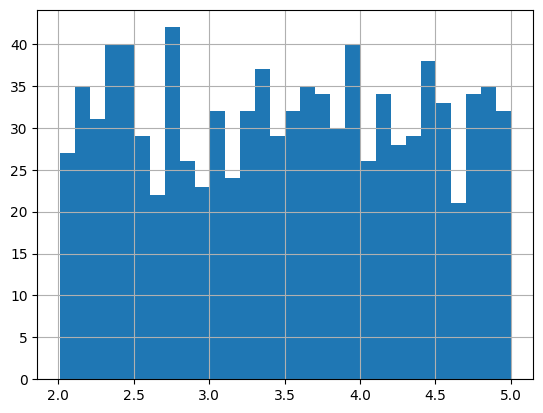

In [14]:
df["Base_Fare"].describe()
df["Base_Fare"].hist(bins=30)

Efter att ha kollat igenom datasetet kan jag inte i detta fall använda mig av ett defaultvärde för Base_Fare. Däremot borde jag kunna räkna ut vad base fare är, baserat på övriga kolumner som tillsammans utgör baseprice. 

In [24]:
df[df["Base_Fare"].isna()].head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
25,39.47,Afternoon,Weekday,1.0,Low,Clear,NaN,NaN,0.35,7.59,83.6965
43,45.56,Afternoon,Weekday,NaN,Low,Clear,NaN,0.90,0.50,80.80,85.8840
50,48.51,Evening,Weekday,3.0,High,Rain,NaN,1.00,0.48,110.18,104.1764
92,38.28,Afternoon,Weekday,1.0,Medium,Clear,NaN,1.08,0.39,51.33,63.5611
107,38.02,Evening,NaN,4.0,NaN,Clear,NaN,1.31,0.35,33.73,66.2817
109,4.77,Morning,Weekend,2.0,High,Clear,NaN,0.96,0.18,105.91,NaN
116,40.38,Morning,Weekday,1.0,Medium,Rain,NaN,0.80,0.23,115.21,63.4323
156,33.93,Morning,Weekday,2.0,Low,Rain,NaN,0.88,0.39,66.77,59.9287
158,12.64,Evening,Weekday,3.0,Medium,Clear,NaN,0.70,0.29,22.91,20.3819


<Axes: xlabel='Base_Fare', ylabel='Trip_Price'>

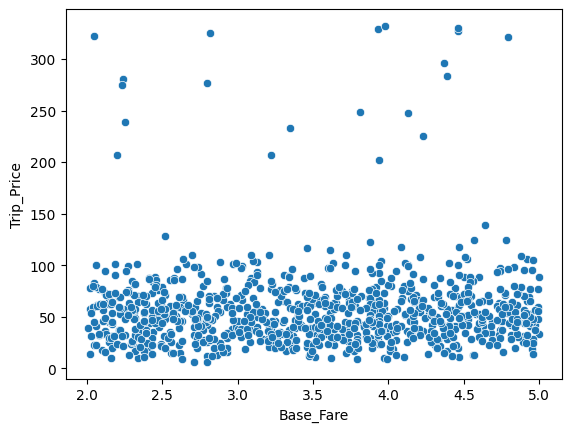

In [17]:
sns.scatterplot(x="Base_Fare", y="Trip_Price", data=df)

##### Räkna ut trip_price:

TripPrice = Base_Fare + (Per_Km_Rate * Trip_Distance_km) + + (Per_Minute_Rate * Trip_Duration_Minutes)

Base_Fare = Trip_Price - (Per_Km_Rate * Trip_Distance_km) - (Per_Minute_Rate * Trip_Duration_Minutes)

In [30]:
df_calculate = df.copy()

df_calculate = df_calculate.dropna(subset=["Trip_Price", "Trip_Duration_Minutes", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Distance_km"])

In [32]:
print("Antal rader innan:", len(df))
print("Antal rader efter:", len(df_calculate))

Antal rader innan: 1000
Antal rader efter: 772


Avvägning - Om jag droppar alla null-värden i "Trip_Price", "Trip_Duration_Minutes", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Distance_km" förlorar jag 228 rader. Utan dessa värden kan jag dock inte räkna ut base price. Jag bedömer att 772 rader är tillrcklig data för att jag ska kunna göra en prediction av taxiresor längre fram. Bestämmer mig därför för att dropp null-värden i dessa kolumner. 

In [37]:

df_calculate = df.copy()
df_calculate = df_calculate.dropna(subset=[
    "Trip_Price","Trip_Duration_Minutes","Per_Km_Rate","Per_Minute_Rate","Trip_Distance_km"
])

df_calculate["Base_Fare_calc"] = (
    df_calculate["Trip_Price"]
    - df_calculate["Per_Km_Rate"] * df_calculate["Trip_Distance_km"]
    - df_calculate["Per_Minute_Rate"] * df_calculate["Trip_Duration_Minutes"]
)

df_calculate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       772 non-null    float64
 1   Time_of_Day            731 non-null    object 
 2   Day_of_Week            735 non-null    object 
 3   Passenger_Count        737 non-null    float64
 4   Traffic_Conditions     730 non-null    object 
 5   Weather                733 non-null    object 
 6   Base_Fare              734 non-null    float64
 7   Per_Km_Rate            772 non-null    float64
 8   Per_Minute_Rate        772 non-null    float64
 9   Trip_Duration_Minutes  772 non-null    float64
 10  Trip_Price             772 non-null    float64
 11  Base_Fare_calc         772 non-null    float64
dtypes: float64(8), object(4)
memory usage: 78.4+ KB
